# Exercice 1 : Clustering - Prédiction des nombres
Dans cet exercice, on souhaite utiliser un algorithme de clustering pour reconnaitre des
nombres écrits à main levé. Pour cela, un dataset labélisé existe déjà et vous permettra ainsi
d’évaluer simplement la qualité de votre clustering. <br>
1.  En utilisant la fonction load_digit de sklearn, charger le dataset et afficher la forme (shape) de celui-ci


In [30]:
from sklearn.datasets import load_digits

digits = load_digits()
print(digits.data.shape)

(1797, 64)


2. En utilisant la fonction imshow de matplotlib, afficher quelques samples du dataset chargé.
Le titre doit contenir le nombre correspondant à l’image chargée.


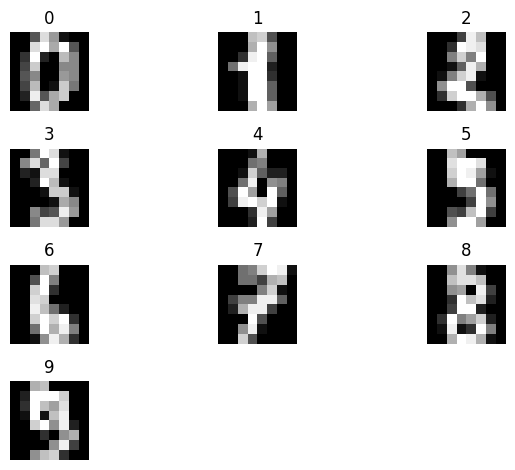

In [26]:
from matplotlib import pyplot as plt

for i in range(10):
    plt.subplot(4, 3, i + 1,)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(digits.target[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

3. En utilisant un des algorithmes vus en cours (KMeans), effectuer un clustering du dataset.
Quel nombre de cluster doit-on utiliser dans ce cas précis ?

In [39]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=10)
target = kmeans.fit_predict(digits.data)


4. Afficher quelques exemples d’images avec leur label prédit.


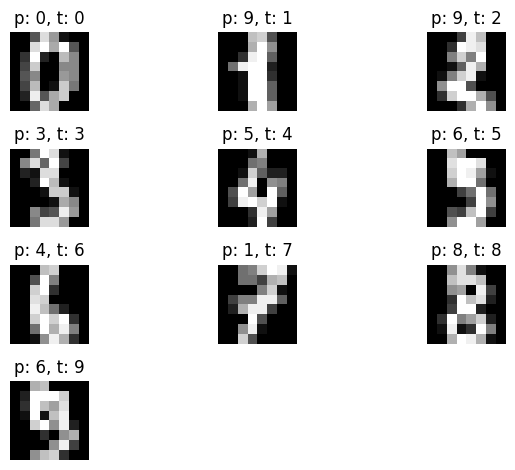

In [28]:
for i in range(10):
    plt.subplot(4, 3, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"p: {target[i]}, t: {digits.target[i]}")
    plt.axis('off')
plt.tight_layout()


5. Afficher les centres des clusters trouvés

In [29]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  2.24719101e-02,  4.25280899e+00,
         1.31629213e+01,  1.12471910e+01,  2.92134831e+00,
         3.37078652e-02, -5.55111512e-17,  2.60208521e-18,
         8.87640449e-01,  1.26629213e+01,  1.33595506e+01,
         1.13820225e+01,  1.13483146e+01,  9.66292135e-01,
        -1.38777878e-17,  1.30104261e-18,  3.74719101e+00,
         1.42078652e+01,  5.19662921e+00,  2.09550562e+00,
         1.20955056e+01,  3.53370787e+00, -6.93889390e-18,
        -4.33680869e-19,  5.31460674e+00,  1.26348315e+01,
         2.01685393e+00,  2.30337079e-01,  9.06179775e+00,
         6.46629213e+00, -8.67361738e-19,  0.00000000e+00,
         5.88202247e+00,  1.14831461e+01,  8.70786517e-01,
         2.80898876e-02,  8.78089888e+00,  7.15730337e+00,
         0.00000000e+00, -3.46944695e-18,  3.52808989e+00,
         1.33033708e+01,  1.58988764e+00,  1.41573034e+00,
         1.13258427e+01,  5.85955056e+00,  3.46944695e-18,
         8.67361738e-19,  8.08988764e-01,  1.31685393e+0

1. En partant du code de l’exercice 1, écrire une fonction permettant de calculer la moyenne des inerties des clusters générés.


2. Généraliser cette fonction en un code permettant de générer le graphe ci-dessous (figure 1) : il affiche l’inertie du clustering en fonction du nombre de clusters passé en paramètre de KMeans.

In [114]:
def show_inertia_graph(data):
    inertias = []
    for i in range(1, 21):
        tmp= []
        for j in range(10):
            kmeans = KMeans(n_clusters=i)
            kmeans.fit(data)
            tmp.append(kmeans.inertia_)
        inertias.append(np.mean(tmp))
    plt.plot(range(1, 21), inertias)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average inertia')
    plt.show()

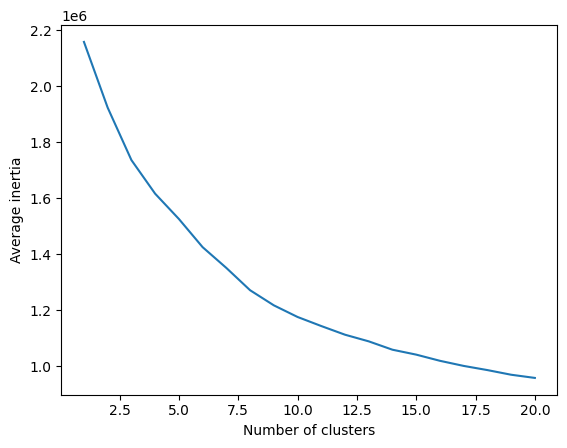

In [115]:
show_inertia_graph(digits.data)

In [116]:
from scipy.spatial.distance import cdist
def distortion(model: KMeans, data):
    distortion = np.mean(
        np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)
    )
    return distortion

In [117]:
def show_distortion_graph(data):
    distortions = []
    for i in range(1, 21):
        tmp = []
        for j in range(10):
            kmeans = KMeans(n_clusters=i)
            kmeans.fit(data)
            tmp.append(distortion(kmeans, data))
        distortions.append(np.mean(tmp))
    plt.plot(range(1, 21), distortions)
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

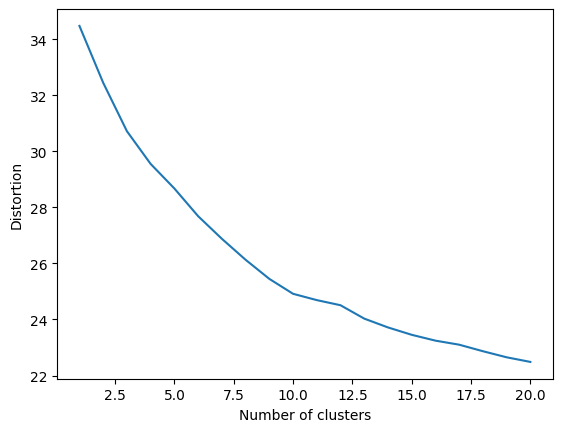

In [118]:
show_distortion_graph(digits.data)

4. Utiliser les algorithmes précédemment développés pour trouver la meilleure valeur du paramètre k pour les datasets suivants

In [119]:
#Blobs
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

n_samples = 1500
random_state = 12

blobs, y = make_blobs(n_samples=n_samples, random_state=random_state)

In [120]:
# Iris
from sklearn.datasets import load_iris
iris = load_iris().data

In [121]:
# Salary & Experience
import pandas as pd
salaries = pd.read_csv('datas/Salary_Data.xls')

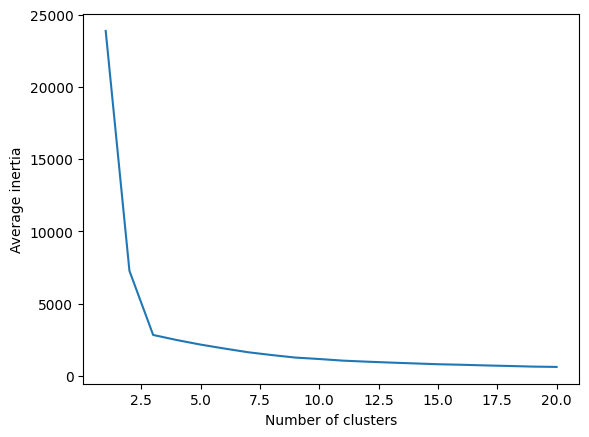

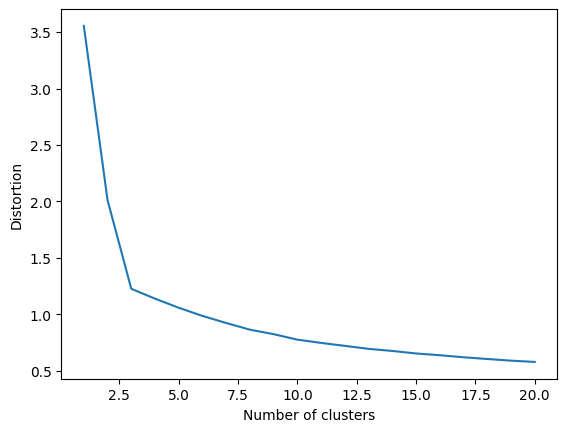

In [122]:
show_inertia_graph(blobs)
show_distortion_graph(blobs)

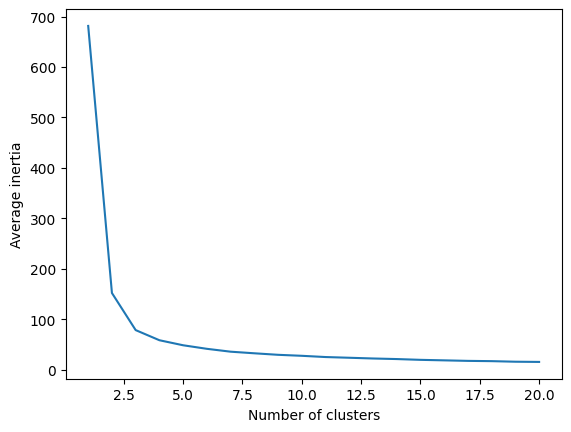

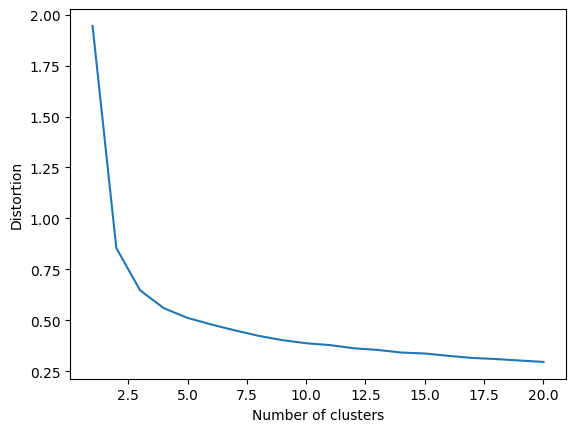

In [123]:
show_inertia_graph(iris)
show_distortion_graph(iris)

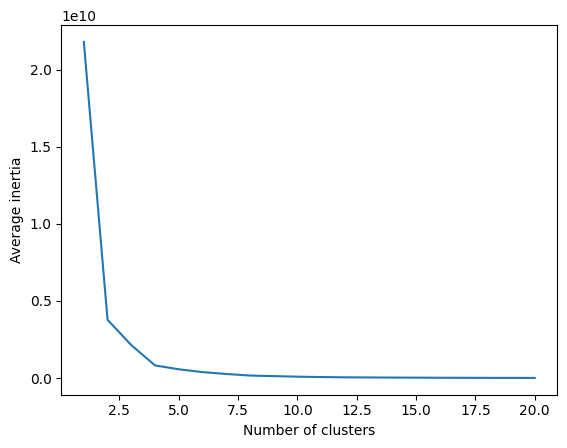

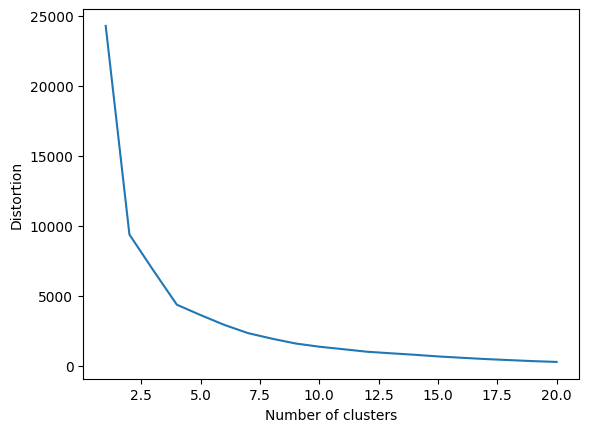

In [124]:
show_inertia_graph(salaries)
show_distortion_graph(salaries)

# Exercice 3 : Reduction de dimentionalité - Visualisation du dataset IRIS avec PCA
Dans cet exercice, l’objectif est d’apprendre à utiliser la PCA sur un exemple simple.
1. Charger le dataset IRIS.


In [126]:
iris = load_iris()
print(iris.data.shape)
X, y = iris.data, iris.target


(150, 4)


2. Afficher et analyser le dataset les premières lignes du dataset. Que représente-t-il ?


In [127]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

3. Afficher les variables par paire (longueur des sépales vs largeur des pétales, longueur des pétales vs largeur des sépales, etc.). Chaque point doit être coloré par la classe correspondant au type de fleur.


Text(0, 0.5, 'sepal width (cm)')

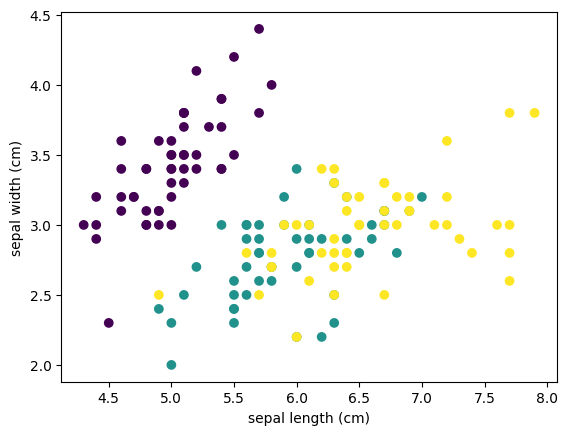

In [131]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Text(0, 0.5, 'petal width (cm)')

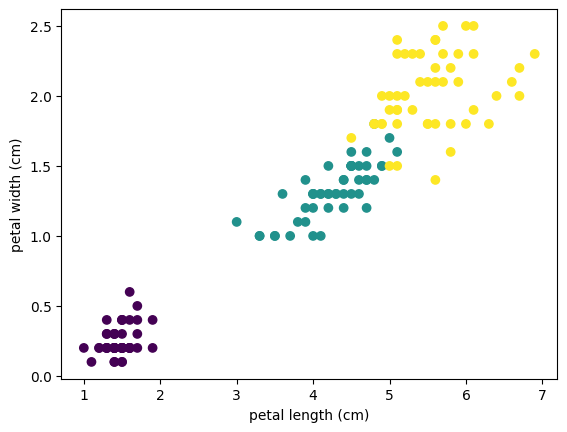

In [132]:
plt.scatter(X[:, 2], X[:, 3], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

4. Afficher un pairplot. Que représente-t-il ?


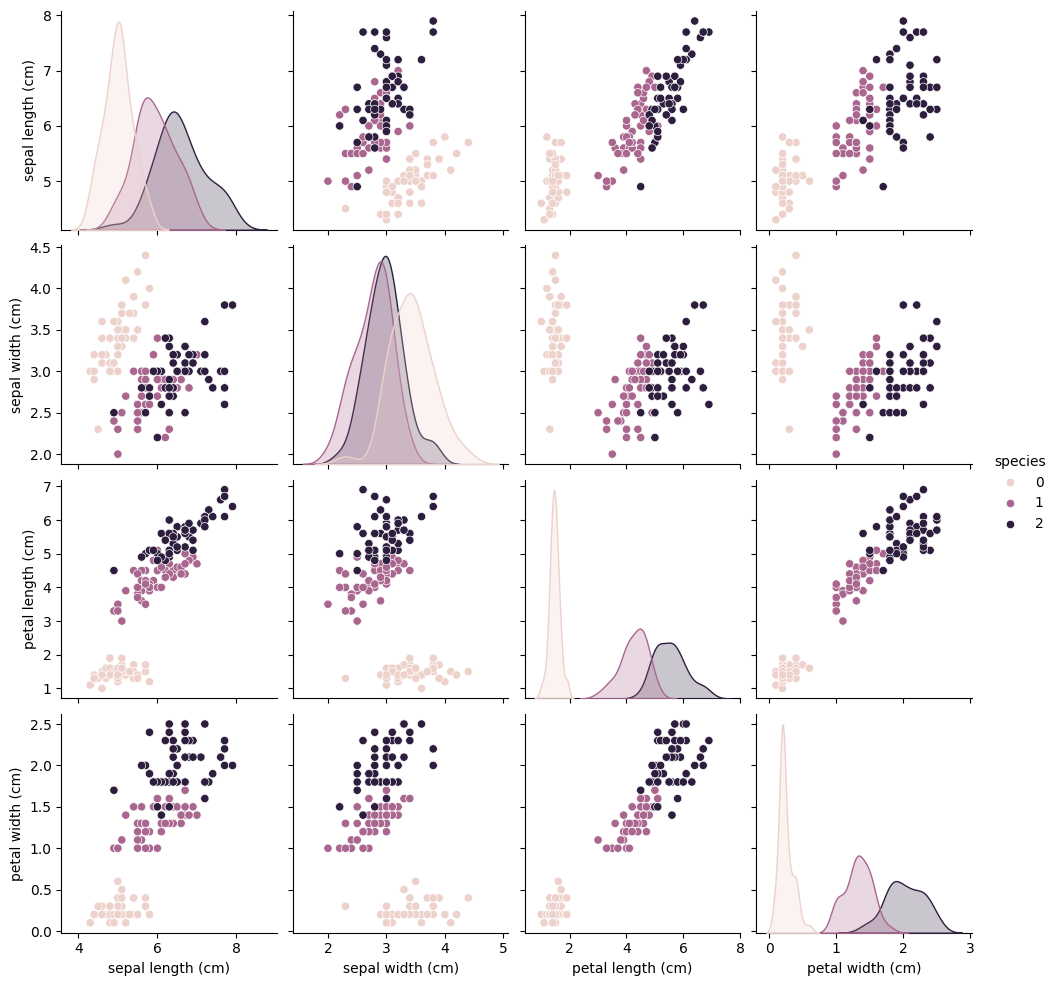

In [139]:
import pandas as pd
from seaborn import pairplot
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
pairplot(iris_df, hue='species')

5. Calculer et afficher la matrice de corrélation de ce dataset. Que représente-t-elle ?


<Axes: >

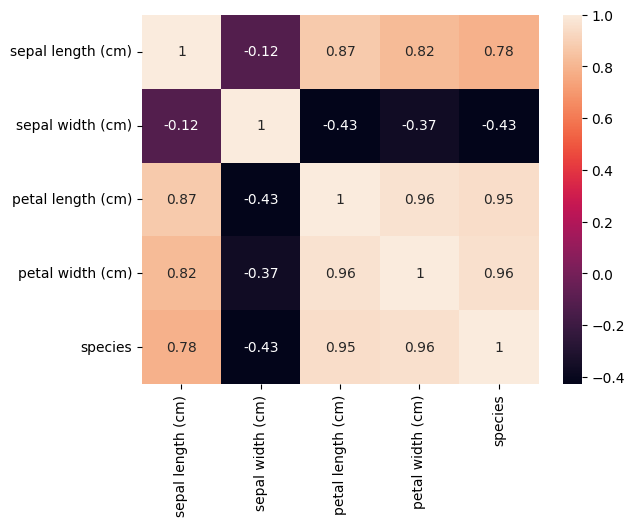

In [140]:
# Correlation matrix
from seaborn import heatmap

heatmap(iris_df.corr(), annot=True)


6. Appliquer une PCA vers 2 dimensions au dataset


In [151]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [155]:
X_pcaed = pca.fit_transform(X)
X_pcaed.shape

(150, 2)

In [153]:
pca.explained_variance_ratio_
# La première composante explique 92.46% de la variance
# La deuxième composante explique 5.30% de la variance
# On peut donc réduire la dimensionnalité de nos données à 2 sans perdre trop d'information (Environ 2% de pertes)

array([0.92461872, 0.05306648])

7. Afficher le résultat de la PCA. Que pensez-vous de la capacité à identifier les types de fleurs ?

Text(0.5, 0, 'PCA1')

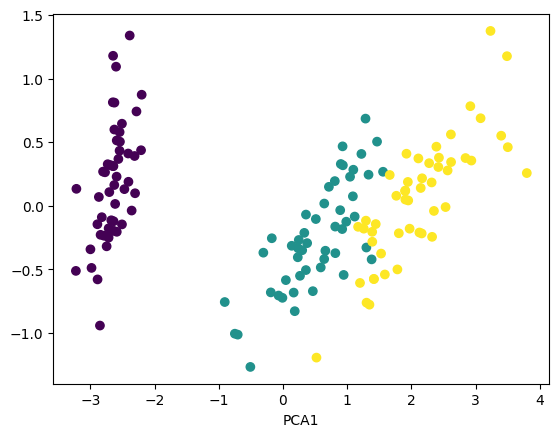

In [ ]:
plt.scatter(X_pcaed[:, 0], X_pcaed[:, 1], c=y)

# Exercice 4 : Reduction de dimentionalité - Visualisation du dataset avec PCA et t-SNE
Dans cet exercice, nous allons comparer différents algorithmes de réduction de
dimensionnalité, linéaire ou non.
1. Charger le dataset wine. Explorer le dataset. Que représente-t-il ?


In [156]:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target

In [161]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

2. Afficher les pairplot de ce dataset. Quel est votre analyse ?


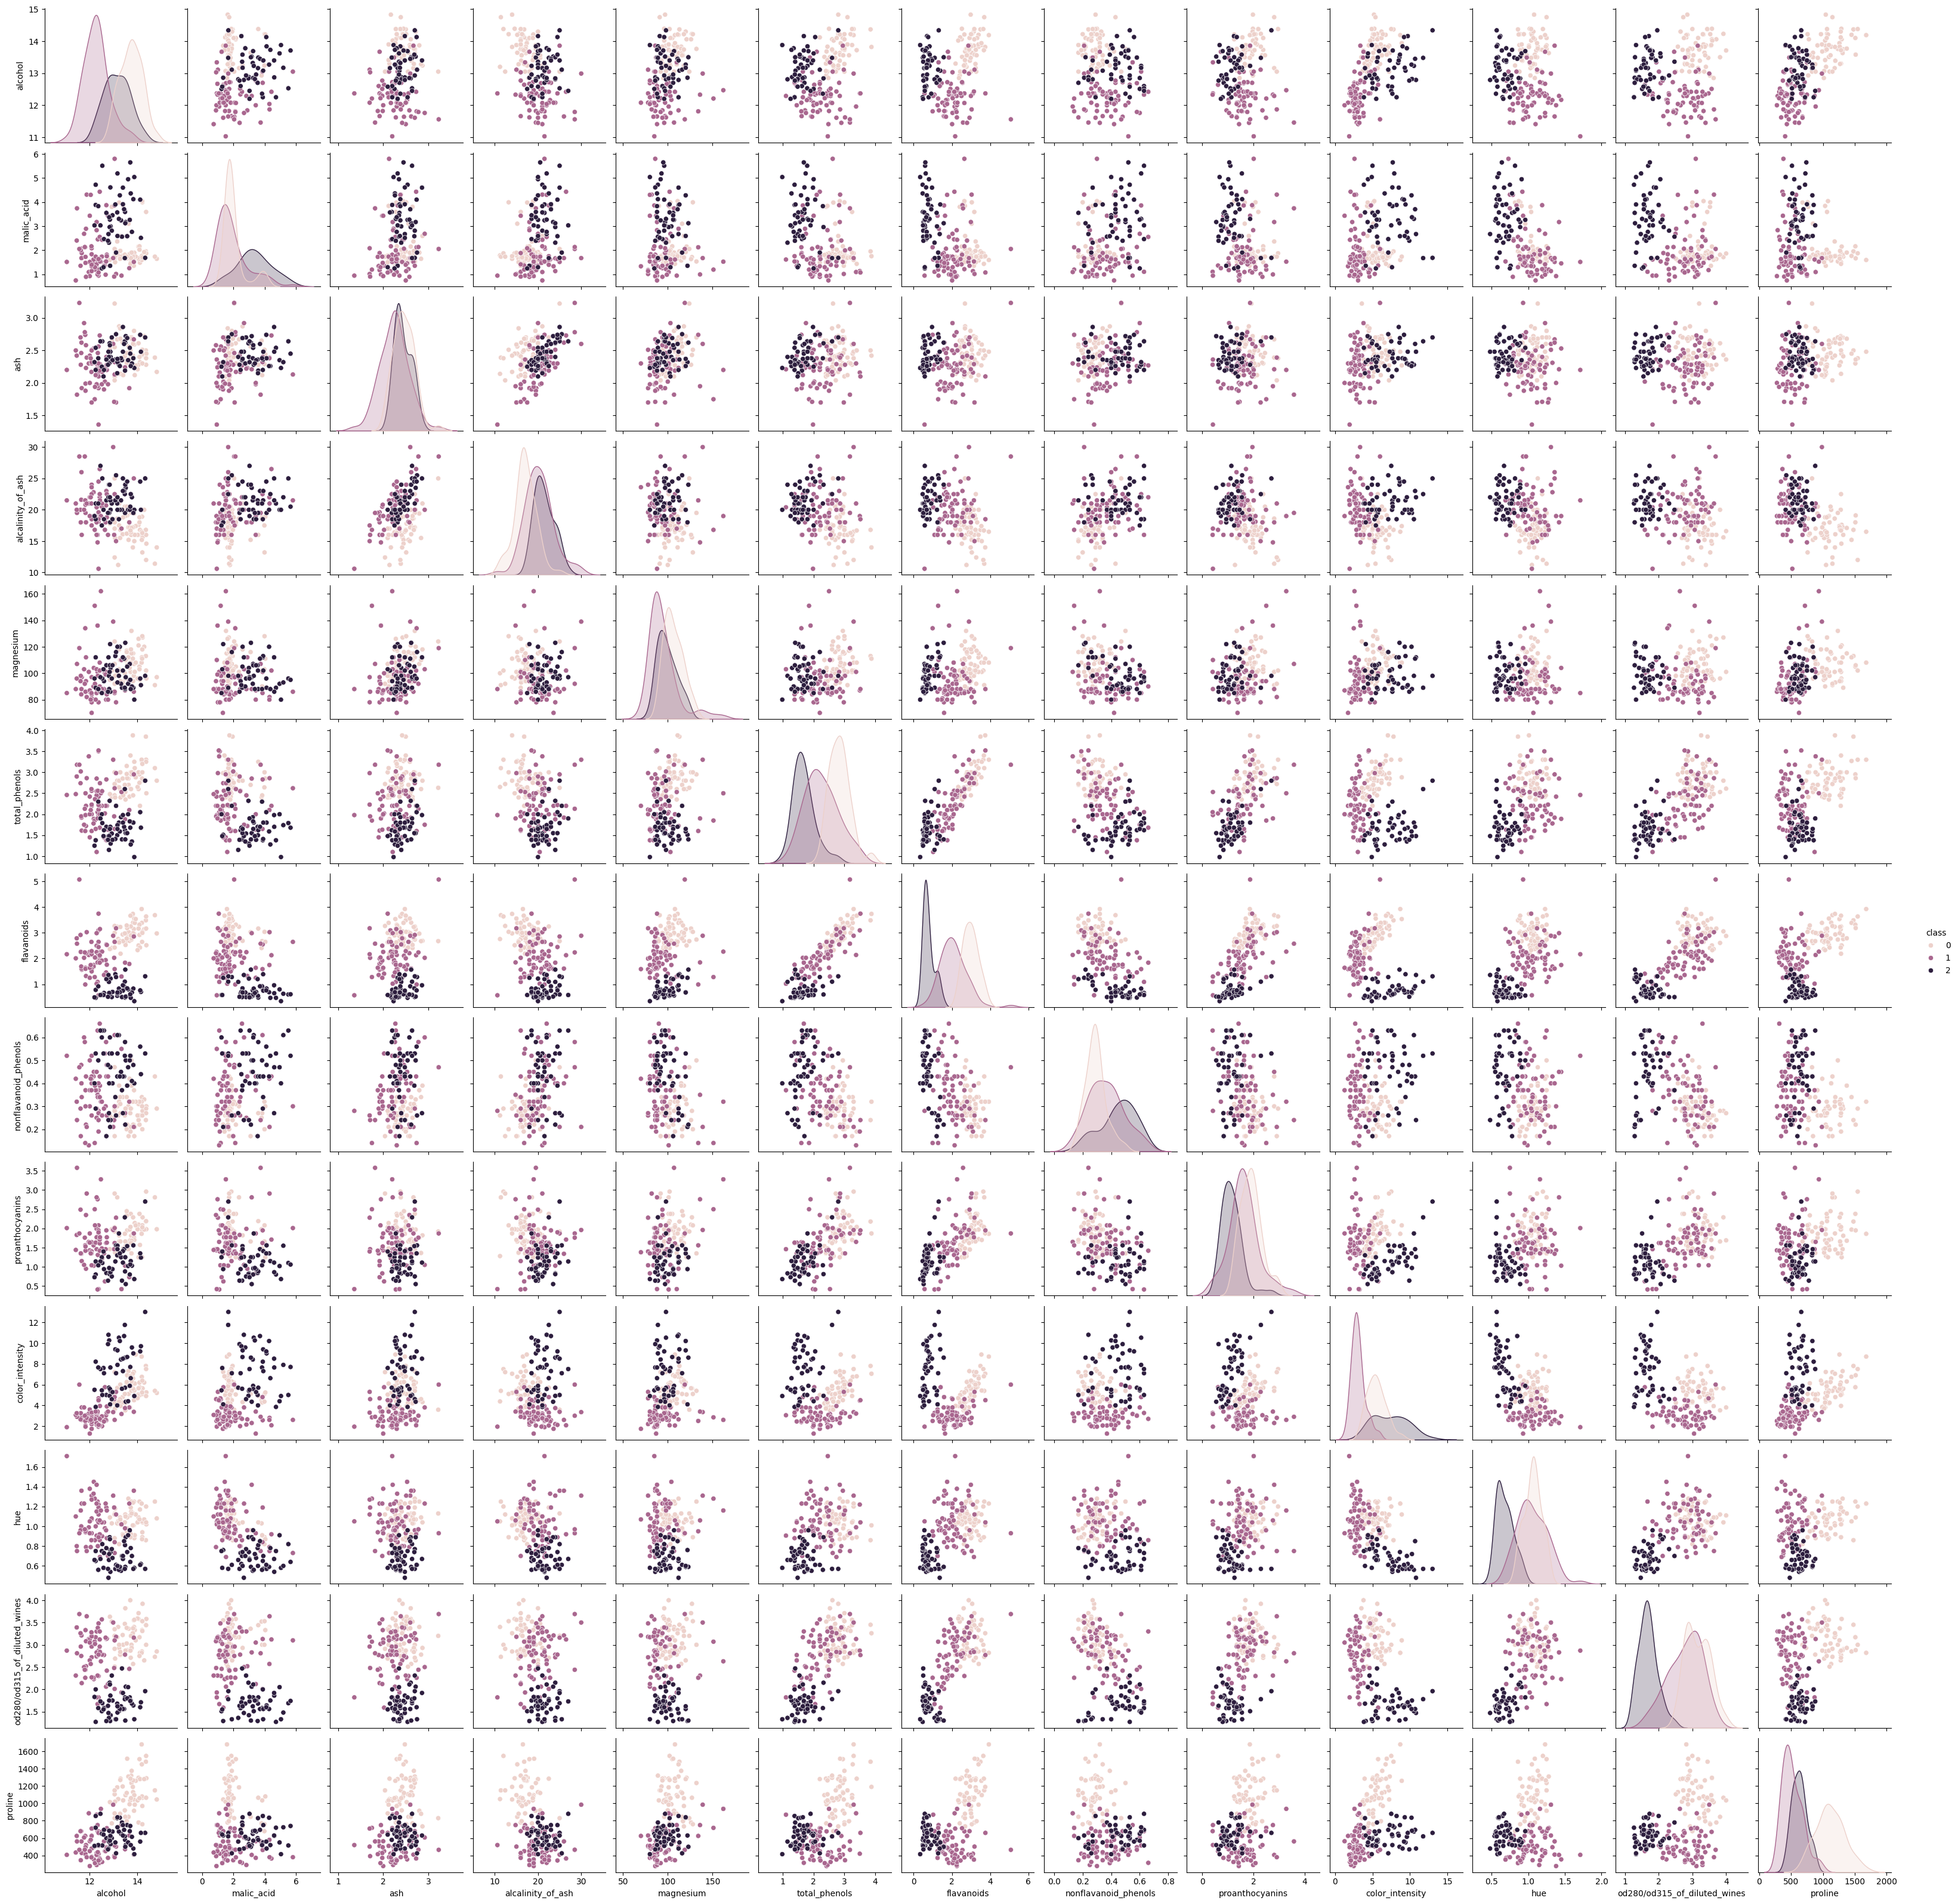

In [164]:
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['class'] = wine.target
pairplot(wine_df, hue='class')


3. Afficher la matrice de corrélation de ce dataset et l’analyser.


<Axes: >

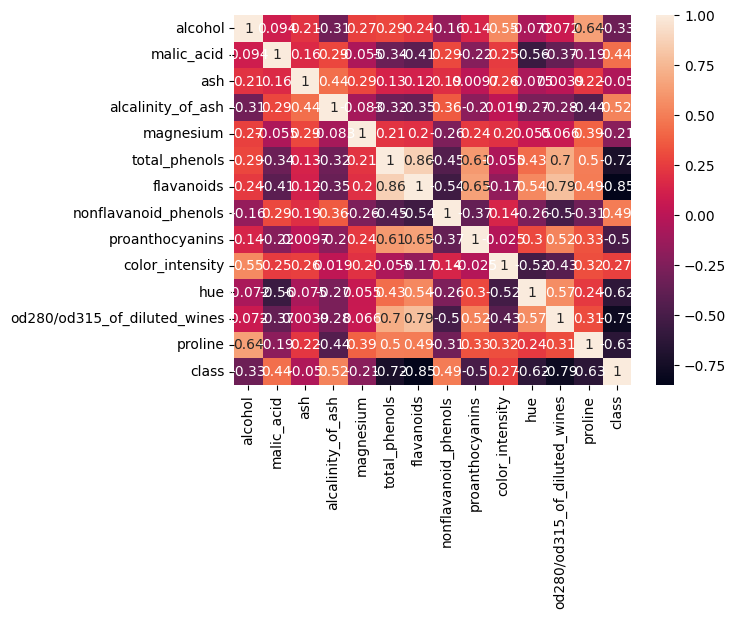

In [167]:
heatmap(wine_df.corr(), annot=True)

4. Appliquer une PCA vers 2 dimensions aux datasets.


In [176]:
wine_pca = PCA(n_components=2)
X_pcaed = wine_pca.fit_transform(X)

In [177]:
wine_pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

5. Afficher le résultat de la PCA. Que pensez-vous de la capacité des algorithmes linéaires à prédire les classes ?


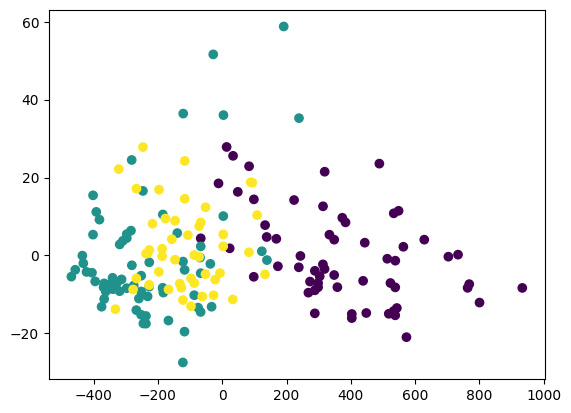

In [180]:
plt.scatter(X_pcaed[:, 0], X_pcaed[:, 1], c=y)

6. Appliquer une t-SNE vers 2 dimensions sur le dataset en faisant varier la perplexité


In [183]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

7. Afficher le résultat de la t-SNE. Que pensez-vous de la capacité des algorithmes non- linéaires à prédire les classes ?


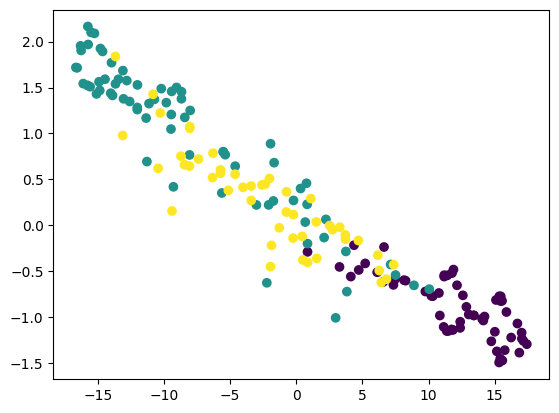

In [186]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)

8. Tester l’algorithme UMap.


9. Refaire les questions de 1 à 6 avec le dataset breast_cancer

# Exercice 5 : Clustering - Autres méthodes de clustering
1. En utilisant la fonction make_classification, générer un dataset artificiel contenant 2 ou 3 caractéristiques (pour que le dataset soit affichable sur un graphe), 2 classes avec 1 cluster par classe et 1000 exemples.


In [188]:
#make_classification
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000,n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=2, n_repeated=0, random_state=1)

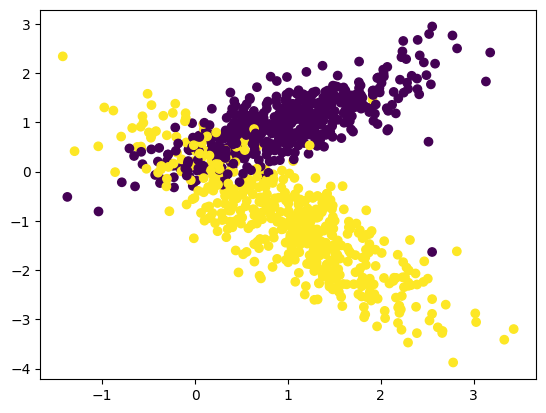

In [189]:
scatter = plt.scatter(X[:, 0], X[:, 1], c=y)

2. Explorer, analyser et tester les algorithmes de clustering suivants
- a/  KMeans


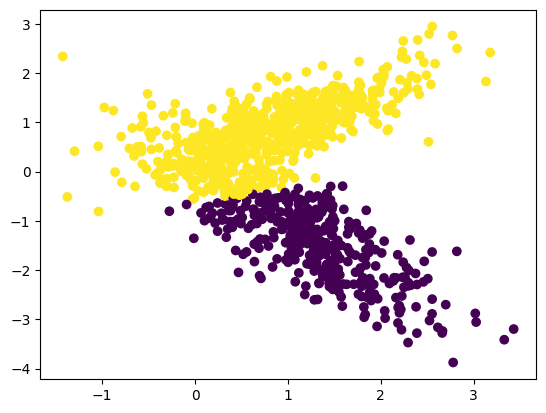

In [190]:
kmeans = KMeans(n_clusters=2)
target = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=target)

- b/ DBScan (Density-Based Spatial Clustering of Application and Noise)


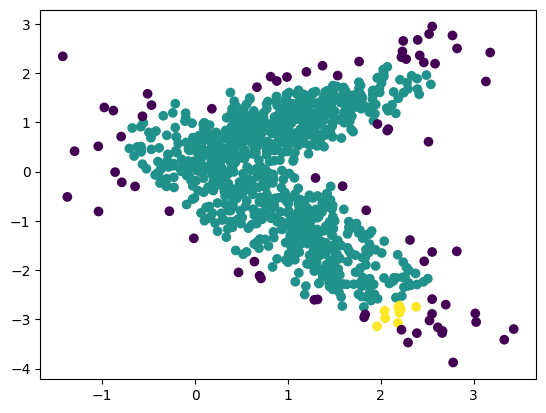

In [191]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2)
dbscan_target = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_target)

- c/ GMM (Gaussian Mixture Model)

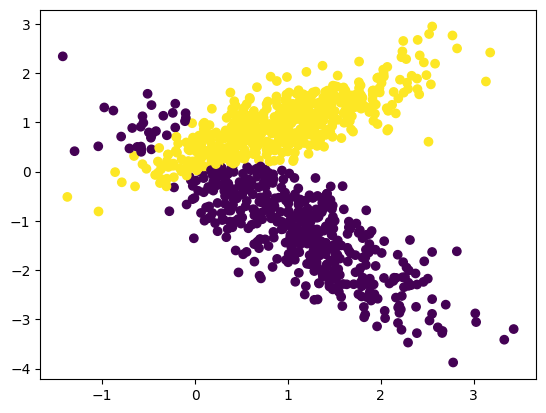

In [193]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm_target = gmm.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=gmm_target)

In [205]:
def compare_algos():
    fig, axs = plt.subplots(3, 4, figsize=(15, 5))
    for r_state in range(3):
        X, y = make_classification(n_samples=1000,n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=2, n_repeated=0)
        axs[r_state, 0].scatter(X[:, 0], X[:, 1], c=y)
        axs[r_state, 0].set_title(f"Random state: {r_state}")
        for i, algo in enumerate([kmeans, dbscan, gmm]):
            target = algo.fit_predict(X)
            axs[r_state, i +1].scatter(X[:, 0], X[:, 1], c=target)
            axs[r_state, i+1].set_title(algo.__class__.__name__)
    plt.show()

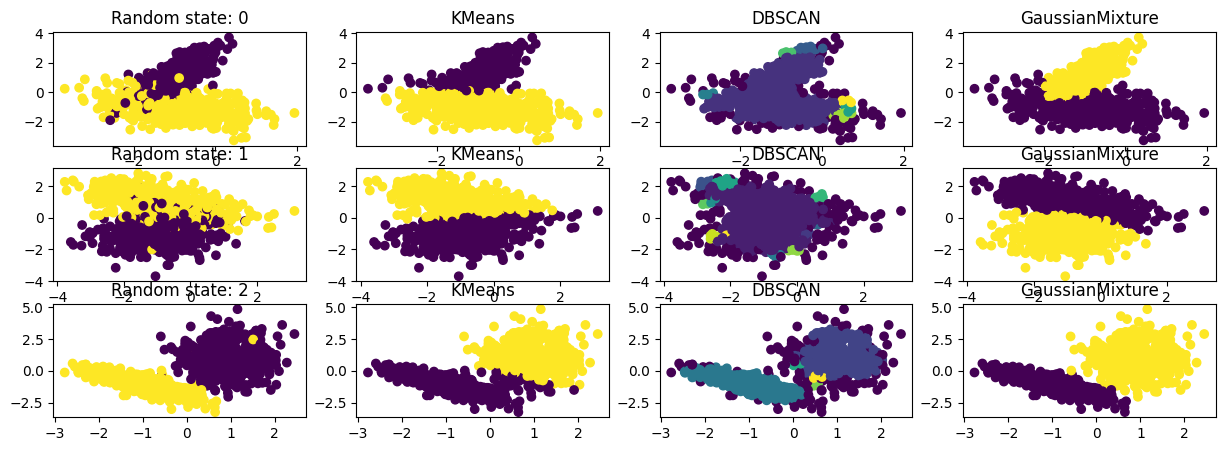

In [206]:
compare_algos()